# 1. Train a Decision Tree Classifier and visualize the tree.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Decision Tree Train Accuracy:", round(train_accuracy, 2))
print("Decision Tree Test Accuracy:", round(test_accuracy, 2))

Decision Tree Train Accuracy: 1.0
Decision Tree Test Accuracy: 0.99


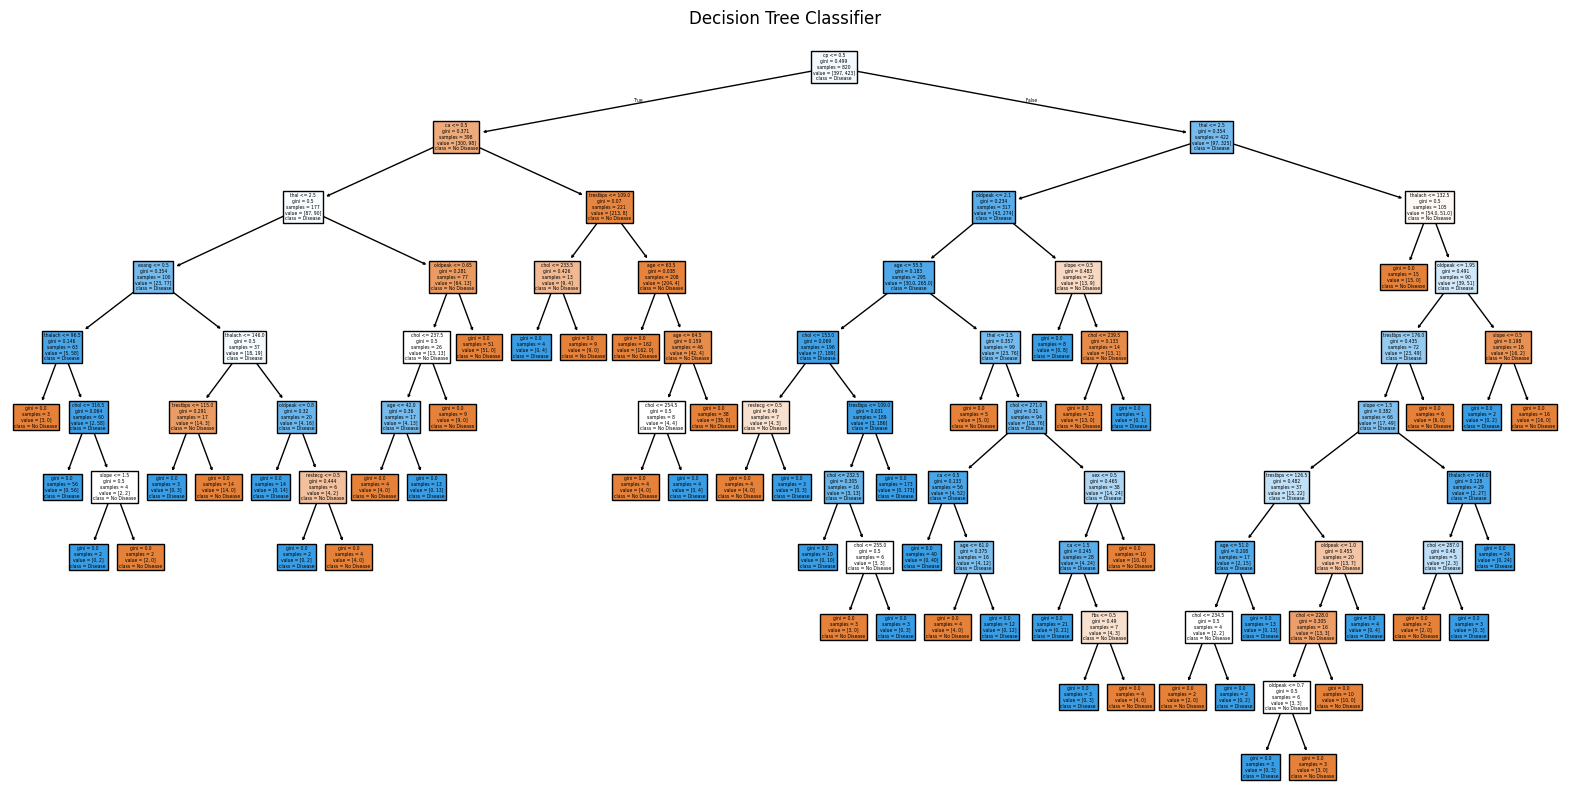

In [5]:
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("Decision Tree Classifier")
plt.show()

# 2. Analyze overfitting and control tree depth.

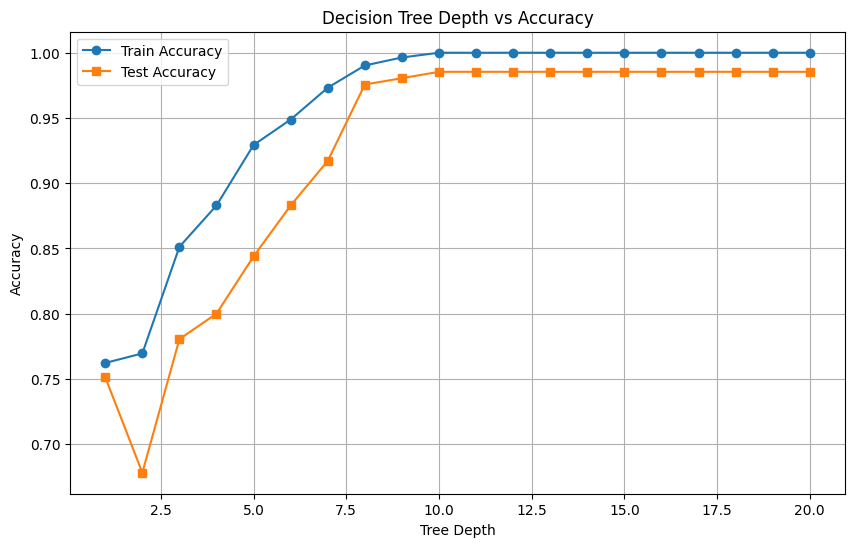

In [6]:
depths = range(1, 21)
train_scores = []
test_scores = []
for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))
plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, label="Train Accuracy", marker='o')
plt.plot(depths, test_scores, label="Test Accuracy", marker='s')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Depth vs Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# 3. Train a Random Forest and compare accuracy.

In [14]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("Random Forest Train Accuracy:", round(rf.score(X_train, y_train), 2))
print("Random Forest Test Accuracy:", round(rf.score(X_test, y_test), 2))

Random Forest Train Accuracy: 1.0
Random Forest Test Accuracy: 0.99


# 4. Interpret feature importances

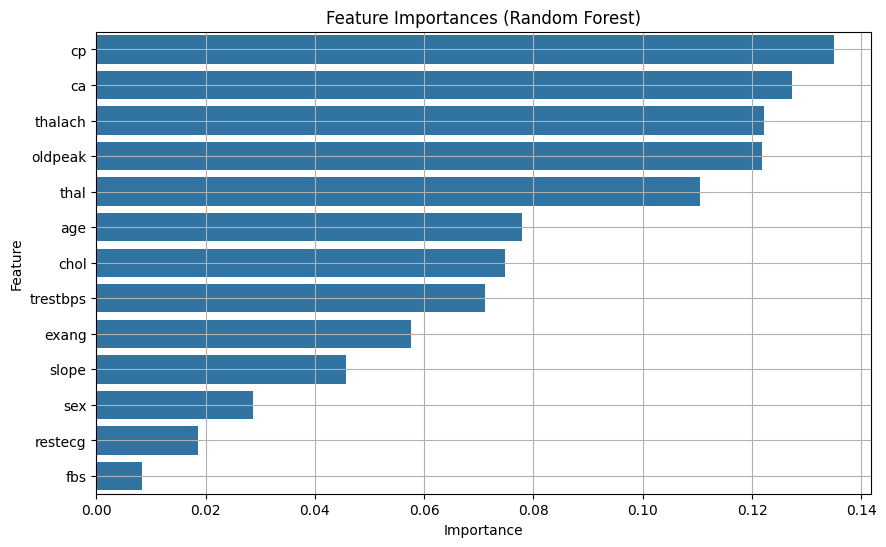

In [16]:
importances = rf.feature_importances_
features = pd.Series(importances, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=features.index)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(True)
plt.show()

# 5. Evaluate using cross-validation.

In [19]:
cv_scores = cross_val_score(rf, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross Validation Accuracy:", round(cv_scores.mean(), 2))

Cross-Validation Scores: [1.         1.         1.         1.         0.98536585]
Mean Cross Validation Accuracy: 1.0
